In [ ]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from random import shuffle
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split

In [ ]:
load_data = pd.read_excel("/content/Load Data in kW.xlsx")
load_data.head()

,5551.82208
0,4983.17184
1,4888.39680
2,5072.95872
3,5196.25980
4,5641.29720


In [ ]:
load_data.describe()

,5551.82208
count,2183.000000
mean,6393.616060
std,17143.020064
min,3377.919600
25%,5257.520640
50%,5935.910400
75%,6738.692400
max,805444.430400


In [ ]:
load_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183 entries, 0 to 2182
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   5551.82208  2183 non-null   float64
dtypes: float64(1)
memory usage: 17.2 KB


{'boxes': [<matplotlib.lines.Line2D at 0x7f552914d210>],
 'caps': [<matplotlib.lines.Line2D at 0x7f552911b410>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f55291b4390>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5529190990>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f55292c0050>,
  <matplotlib.lines.Line2D at 0x7f55290f1550>]}

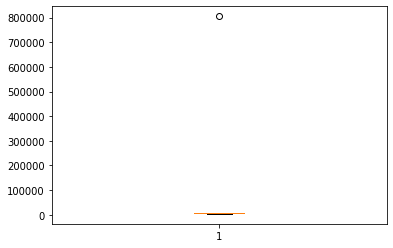

In [ ]:
plt.boxplot(load_data.iloc[:,0])

In [ ]:
from scipy import stats

z = np.abs(stats.zscore(load_data.iloc[:,0]))

threshold = 3
print(np.where(z > 3))

(array([928]),)


In [ ]:
load_data.iloc[928,0] = load_data.iloc[927,0]

{'boxes': [<matplotlib.lines.Line2D at 0x7f5526a4c490>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5526a514d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f55269d9510>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5526a51f90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5526a4ca10>,
  <matplotlib.lines.Line2D at 0x7f5526a4cf50>]}

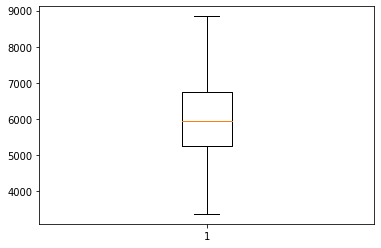

In [ ]:
plt.boxplot(load_data.iloc[:,0])

In [ ]:
x = []
y = []
for i in range(len(load_data.iloc[:,0])-24):
  x.append(load_data.iloc[i,0])
  y.append(load_data.iloc[i+24,0])

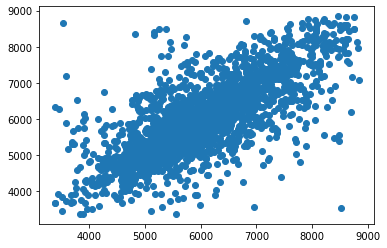

In [ ]:
plt.scatter(x,y)

In [ ]:
def error(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum = sum + math.pow(d[i][1]-m*d[i][0]-c,2)
  return 0.5*sum/len(d)

def gradm(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum = sum + (d[i][1]-m*d[i][0]-c)*d[i][0]
  return -1*sum/len(d)

def gradc(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum = sum + (d[i][1]-m*d[i][0]-c)
  return -1*sum/len(d)

In [ ]:
learning_rate = 0.01
epochs = 20

m = 1
c = 1

v_m = 0
v_c = 0
momentum_coeff = 0.9

batch_size = 500

In [ ]:
x = minmax_scale(x)
y = minmax_scale(y)

In [ ]:
data = []

for i in range(number_of_samples):
  data.append((x[i],y[i]))

print(len(data))

data_train,data_test = train_test_split(data,test_size=0.1)

len(data_train)

2159


1943

In [ ]:
error_list = []
number_of_batches = (len(data_train)//batch_size)
for i in range(epochs):
  for j in range(number_of_batches+1):
    if j == number_of_batches:
      d = data_train[j*batch_size:]
    else:
      d = data_train[j*batch_size:(j+1)*batch_size]

    deltam = -1*learning_rate*gradm(d,m,c)
    deltac = -1*learning_rate*gradc(d,m,c)

    v_m = v_m*momentum_coeff + deltam
    v_c = v_c*momentum_coeff + deltac

    m = m + v_m
    c = c + v_c

    print("epoch {}, batch {}, error {}".format(i,j,error(d,m,c)))
    error_list.append(error(d,m,c))
  random.shuffle(data_train)

epoch 0, batch 0, error 0.5063357117206916
epoch 0, batch 1, error 0.4692380364500308
epoch 0, batch 2, error 0.4486093988476754
epoch 0, batch 3, error 0.40589754974890885
epoch 1, batch 0, error 0.3642126240889018
epoch 1, batch 1, error 0.31859639546373897
epoch 1, batch 2, error 0.28400840733280386
epoch 1, batch 3, error 0.22937356087641422
epoch 2, batch 0, error 0.1917214903248081
epoch 2, batch 1, error 0.15497200001041575
epoch 2, batch 2, error 0.12328328584417053
epoch 2, batch 3, error 0.0929976286068516
epoch 3, batch 0, error 0.07360974759984966
epoch 3, batch 1, error 0.047751127027712545
epoch 3, batch 2, error 0.03438167821144289
epoch 3, batch 3, error 0.023239105342550324
epoch 4, batch 0, error 0.01503637844850524
epoch 4, batch 1, error 0.011218794031625933
epoch 4, batch 2, error 0.010660723680605805
epoch 4, batch 3, error 0.009289517376136565
epoch 5, batch 0, error 0.011038362798843722
epoch 5, batch 1, error 0.011005272201118212
epoch 5, batch 2, error 0.01441

Text(0.5, 1.0, 'error graph')

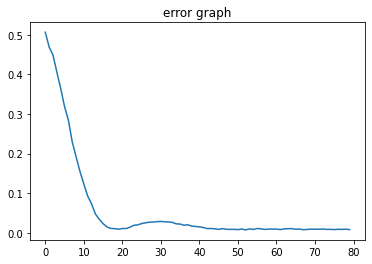

In [ ]:
x1 = range(len(error_list))
y1 = error_list

plt.plot(x1,y1)
plt.title("error graph")

In [ ]:
print("train error :",error(data_train,m,c))
print("test error :",error(data_test,m,c))

train error : 0.008853171620187481
test error : 0.00883075758527381


In [ ]:
print(m,c)

0.6253818777032465 0.18307041731417012


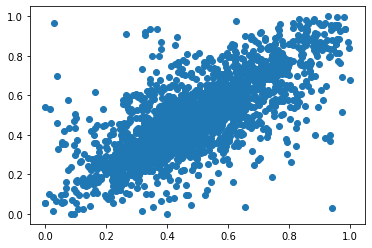

In [ ]:
plt.scatter(x,y)

Text(0.5, 1.0, 'predicted line')

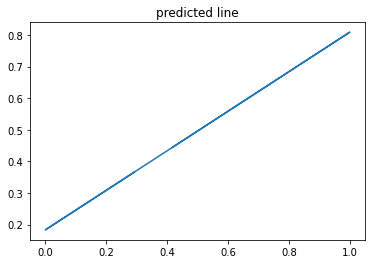

In [ ]:
x1 = x
y1 = [i*m+c for i in x1]
plt.plot(x1,y1)
plt.title("predicted line")

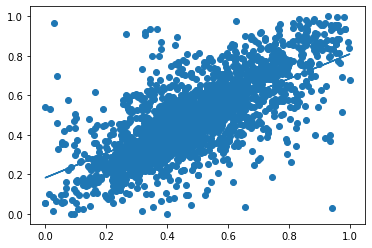

In [ ]:
plt.scatter(x,y)
x1 = x
y1 = [i*m+c for i in x1]
plt.plot(x1,y1)

In [ ]:
input_load = float(input("enter yesterday load at this time : "))

max_value = 8841.669480
min_value = 3377.919600

input_load = (input_load - min_value)/(max_value-min_value)
output_load = input_load*m+c

output_load = output_load*(max_value-min_value)+min_value

print("predicted load for this hour is : ",output_load)

enter yesterday load at this time : 4485
predicted load for this hour is :  5070.5185899523085
